# Redes Q Profundas (DQN)

- Entender el estado del entorno 
- Puntuar acciones posibles
- Elegir la mejor movida 
- Aprender de las consequencias 
- Explorar nuevas estrategias 

Las DQNs utilizan redes neuronales profundas para predecir los valores Q, que son esenciales en Q-learning para estimar la calidad de las acciones en un entorno específico.



In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
mnist.load_data() #Contiene 1tuple y dentro de esta 2tuplas

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(imagenes_entrenamiento, etiquetas_entrenamiento),(imagenes_prueba, etiquetas_prueba) = mnist.load_data()

¿Qué se logra al normalizar las imágenes de entrada dividiendo sus valores por 255? 

La normalización de los valores de entrada a un rango de 0 a 1 es una práctica común en el aprendizaje profundo para mejorar la estabilidad y la eficiencia del entrenamiento.

In [4]:
#Normalizar valores
imagenes_entrenamiento = imagenes_entrenamiento / 255.0 
imagenes_prueba = imagenes_prueba / 255.0

In [5]:
etiquetas_entrenamiento[0]

5

In [6]:
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_prueba = to_categorical(etiquetas_prueba)

In [7]:
etiquetas_entrenamiento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

La capa Flatten transforma las imágenes de 28x28 píxeles en un vector de 784 píxeles para que las capas densas posteriores puedan procesar los datos correctamente.

La función de activación softmax se utiliza en la capa de salida para obtener probabilidades para cada clase en problemas de clasificación multiclase.





In [8]:
modelo = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/Users/leidygarciaguzman/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


¿Cuál es la función del optimizador en el entrenamiento del modelo?

El optimizador guía el entrenamiento ajustando los pesos del modelo para minimizar la función de pérdida, mejorando así la precisión del modelo a lo largo del tiempo.

In [9]:
#Compilar el modelo 
modelo.compile(optimizer ='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

¿Cuál es la función principal del modelo?

El modelo ha sido entrenado para recibir una nueva imagen y predecir qué número está representado en ella.

In [10]:
modelo.fit(imagenes_entrenamiento,
          etiquetas_entrenamiento,
          epochs=5,
          validation_data=(imagenes_prueba, etiquetas_prueba))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.8804 - loss: 0.4255 - val_accuracy: 0.9600 - val_loss: 0.1363
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.9656 - loss: 0.1170 - val_accuracy: 0.9686 - val_loss: 0.0982
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9769 - loss: 0.0790 - val_accuracy: 0.9731 - val_loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.9834 - loss: 0.0560 - val_accuracy: 0.9761 - val_loss: 0.0774
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9883 - loss: 0.0390 - val_accuracy: 0.9767 - val_loss: 0.0795


In [11]:
#Predicciones del conjunto de prueba
predicciones = modelo.predict(imagenes_prueba)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


¿Qué hace la función ver imagen? 

La función ver_imagen está diseñada para mostrar una imagen junto con la etiqueta que el modelo ha predicho y la etiqueta real.

Si la etiqueta predicha es igual a la etiqueta real, el color del texto de la etiqueta es azul.

argmax() es una función que devuelve el índice del valor máximo en un array, usado aquí para obtener la etiqueta predicha.

In [12]:
def ver_imagen(array_predicciones, etiqueta_real, img):
    etiqueta_real, img = etiqueta_real.argmax(), img.squeeze()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    etiqueta_predicha = np.argmax(array_predicciones)
    if etiqueta_predicha == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f'Pred: {etiqueta_predicha} Real: {etiqueta_real}', color=color)

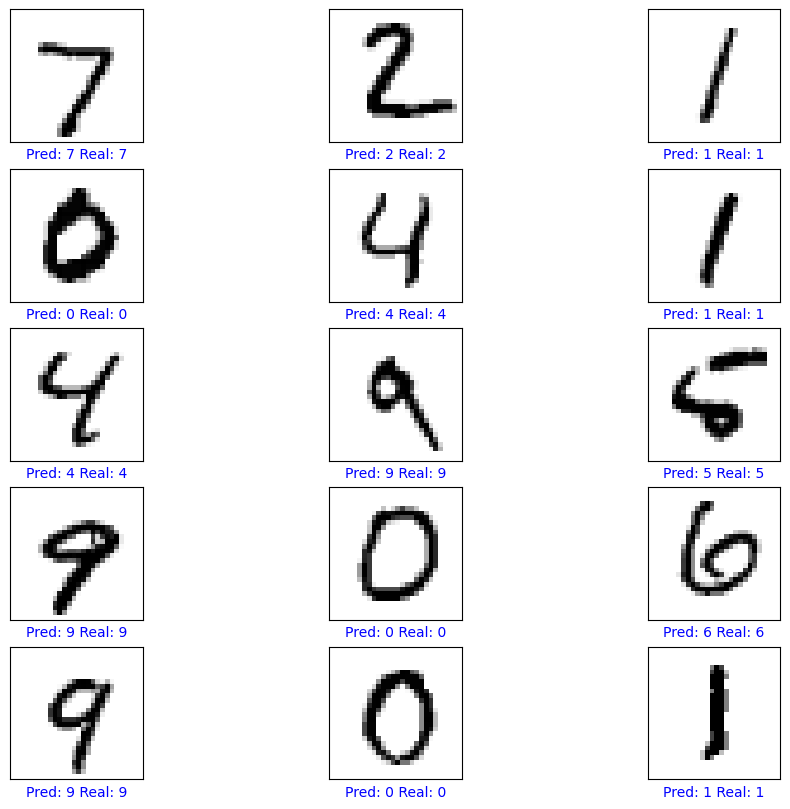

In [13]:
filas = 5
columnas = 3 
numero_imagenes = filas * columnas 
plt.figure(figsize=(2*2*columnas, 2*filas))

for i in range(numero_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    ver_imagen(predicciones[i], etiquetas_prueba[i], imagenes_prueba[i]);